# A simplified system: the pressurized container

In [42]:
import sympy as sp
u,A,B,Es,nu,r,R_O,p,h,E = sp.symbols('u,A,B,E_*,nu,r,R_O,p,h,E')
u = A*r + B/r**2
Es = E / ((1+nu) * (1-2*nu))

sigma_rr = Es*((1+nu)*sp.diff(u,r) + 2*nu*u/r)
A_sol = sp.solve(sigma_rr.subs(r,R_O)-p,A)[0]
u = u.subs(A,A_sol)

sigma_rr = Es*((1+nu)*sp.diff(u,r) + 2*nu*u/r)
B_sol=sp.solve(sigma_rr.subs(r,R_O+h),B)[0]
u = u.subs(B,B_sol)
u = u.subs(r,R_O)
u_approx = u.series(h,0,0).as_ordered_terms()[0]
u_approx = sp.simplify(u_approx)
u_approx

# lt=sp.latex(u_approx)
# import re
# lt = re.sub(r'\{([A-Za-z0-9])\}', r'\1', lt)
# print(lt)

expr = (2*nu**3 + 3*nu**2 - 1) / (3*nu+1)
f = sp.lambdify(nu,expr)
f(0.3)

-0.3557894736842105

# The multiphase two-layer system during phase change

In [2]:
from sympy import *
r,A,B,C,D,E,R_I,R_O,nu_I,nu_L,E_L,E_I,gamma,alpha,K_L=symbols('r,A,B,C,D,E,R_I,R_O,nu_I,nu_L,E_L,E_I,gamma,alpha,K_L')
U_L = r*A
U_I = r*B + C/r**2

'''
Enforce continuous displacements at the liquid-ice boundary
'''
A_solution = solve(U_L.subs(r,R_I) - U_I.subs(r,R_I),A)[0]
U_L = U_L.subs(A,A_solution)
U_L

r*(B + C/R_I**3)

In [3]:
'''
Enforce stress continuity between the liquid and ice
'''
# water_stress = 2*K_L*((1+nu_L)*diff(U_L,r) + 2*nu_L*U_L/r)
water_stress = 2*K_L*((1+nu_L)*diff(U_L,r) + U_L/r)
ice_stress =   E_I*((1+nu_I)*diff(U_I,r) + 2*nu_I*U_I/r - gamma)

water_stress_interface = water_stress.subs(r,R_I)
ice_stress_interface = ice_stress.subs(r,R_I)

C_solution = solve(water_stress_interface - ice_stress_interface,C)[0]
U_L = U_L.subs(C,C_solution)
U_I = U_I.subs(C,C_solution)
U_L

r*(B + (3*B*E_I*nu_I + B*E_I - 2*B*K_L*nu_L - 4*B*K_L - E_I*gamma)/(2*(E_I + K_L*nu_L + 2*K_L)))

In [4]:
'''
Zero stress outer boundary condition
'''
ice_stress = E_I*( (1+nu_I)*diff(U_I,r) + 2*nu_I*U_I/r - gamma )
ice_stress_outer = ice_stress.subs(r,R_O)
B_solution = solve(ice_stress_outer,B)[0]
U_L = U_L.subs(B,B_solution)
U_I = U_I.subs(B,B_solution)
collect(simplify(U_L),B)

E_I*gamma*r*(R_I**3 - R_O**3)/(3*E_I*R_I**3*nu_I + E_I*R_I**3 - 3*E_I*R_O**3*nu_I - E_I*R_O**3 - 2*K_L*R_I**3*nu_L - 4*K_L*R_I**3 - 3*K_L*R_O**3*nu_I*nu_L - 6*K_L*R_O**3*nu_I - K_L*R_O**3*nu_L - 2*K_L*R_O**3)

In [5]:
'''
Calculate water pressure
'''
# water_pressure = E_L*((1+nu_L)*diff(U_L,r) + 2*nu_L*U_L/r)
water_pressure = K_L*( diff(U_L,r) + 2*U_L/r)
water_pressure = simplify(water_pressure)
water_pressure=collect(water_pressure,[K_L,E_I,R_O,R_I])
water_pressure

3*E_I*K_L*gamma*(R_I**3 - R_O**3)/(E_I*(3*R_I**3*nu_I + R_I**3 - 3*R_O**3*nu_I - R_O**3) + K_L*(-2*R_I**3*nu_L - 4*R_I**3 - 3*R_O**3*nu_I*nu_L - 6*R_O**3*nu_I - R_O**3*nu_L - 2*R_O**3))

In [6]:
simplify(water_pressure.subs(R_I,0))

3*E_I*K_L*gamma/(E_I*(3*nu_I + 1) + K_L*(3*nu_I*nu_L + 6*nu_I + nu_L + 2))

In [7]:
lt=latex(water_pressure)
import re
lt = re.sub(r'\{([A-Za-z0-9])\}', r'\1', lt)
print(lt)

\frac{3 E_I K_L \gamma \left(R_I^3 - R_O^3\right)}{E_I \left(3 R_I^3 \nu_I + R_I^3 - 3 R_O^3 \nu_I - R_O^3\right) + K_L \left(- 2 R_I^3 \nu_L - 4 R_I^3 - 3 R_O^3 \nu_I \nu_L - 6 R_O^3 \nu_I - R_O^3 \nu_L - 2 R_O^3\right)}


In [8]:
U_L = simplify(U_L)
U_L=collect(U_L,[K_L,E_I,R_O,R_I])
U_L

E_I*gamma*r*(R_I**3 - R_O**3)/(E_I*(3*R_I**3*nu_I + R_I**3 - 3*R_O**3*nu_I - R_O**3) + K_L*(-2*R_I**3*nu_L - 4*R_I**3 - 3*R_O**3*nu_I*nu_L - 6*R_O**3*nu_I - R_O**3*nu_L - 2*R_O**3))

In [9]:
lt=latex(U_L)
import re
lt = re.sub(r'\{([A-Za-z0-9])\}', r'\1', lt)
print(lt)

\frac{E_I \gamma r \left(R_I^3 - R_O^3\right)}{E_I \left(3 R_I^3 \nu_I + R_I^3 - 3 R_O^3 \nu_I - R_O^3\right) + K_L \left(- 2 R_I^3 \nu_L - 4 R_I^3 - 3 R_O^3 \nu_I \nu_L - 6 R_O^3 \nu_I - R_O^3 \nu_L - 2 R_O^3\right)}


## Plot the spherically symmetric water pressure solution as a function of phi

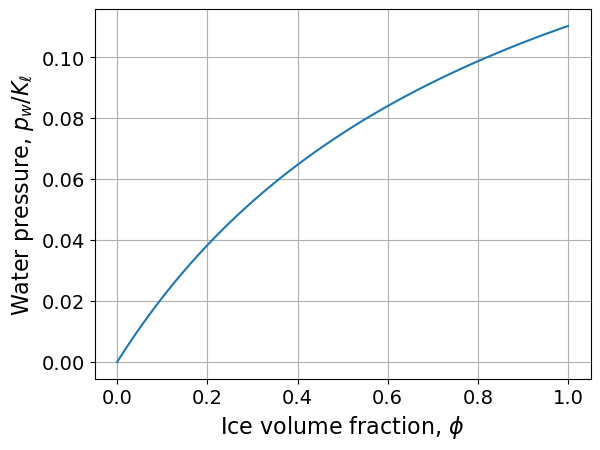

In [12]:
import matplotlib.pyplot as plt
import numpy as np

rhow = 1000
rhoi = 917
gamma = rhow/rhoi-1
phi = np.linspace(0,1,100)

Ei = 8.7e9
nuI=0.3
Kl= 1.96e9
EiS = (3*nuI+1) * Ei
kappa = 3*nuI+1

pw = 6*gamma*phi*Kl*EiS/ ( 5*Kl*(kappa + 2*(1-phi)) + 2 * EiS*kappa*phi)

plt.subplots()
plt.plot(phi,pw/Kl)
plt.xlabel('Ice volume fraction, $\phi$',fontsize=16)
plt.ylabel('Water pressure, $p_w/K_{\ell}$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('freezing.eps')

In [19]:
6*EiS/ ( 5*(kappa + 2)) / 1e9

5.086153846153846

In [22]:
EiS/Ei

1.9